In [195]:
# import
import numpy as np

# Question 1.1
## Q 1.1.1

In [196]:
# 1. Construct a random design matrix X 
X = np.random.rand(150,75)
theta = np.zeros(10)

## Q 1.1.2

In [197]:
t = [-1,1]
theta_1 = np.random.choice(t,10)*10
theta_2 = np.zeros(65)
theta = np.concatenate((theta_1,theta_2), axis=0)

## Q 1.1.3

In [198]:
# 3. Construct a vector y = X theta + epsilon, where epsilon is a random noise vector
epsilon = 0.1*np.random.randn(150)
y = np.dot(X,theta)+epsilon

## Q 1.1.4

In [199]:
# 4. Split the dataset by taking the first 80 points for training, the next 20 points for validation,
# and the last 50 points for testing
X_training = X[0:80,:]
y_training = y[0:80]
X_validation = X[80:100,:]
y_validation = y[80:100]
X_testing = X[100:150,:]
y_testing = y[100:150]

# Question 2

In [200]:
import os
import numpy as np
os.chdir("D:/Spring_2017/data/")

X_training = np.loadtxt("X_train.txt")
y_training = np.loadtxt("y_train.txt")
X_validation = np.loadtxt("X_valid.txt")
y_validation = np.loadtxt("y_valid.txt")
X_testing = np.loadtxt("X_test.txt")
y_testing = np.loadtxt("y_test.txt")

In [201]:
## Feature normalization
def feature_normalization(train, test):
    max_train = train.max(axis=0)
    min_train = train.min(axis=0)
    train_normalized = (train-min_train)/(max_train-min_train)
    test_normalized = (test-min_train)/(max_train-min_train) 
    return train_normalized, test_normalized
X_training, X_validation = feature_normalization(X_training, X_validation)

In [231]:
import numpy
from scipy.optimize import minimize
from sklearn.linear_model import Ridge

(N,D) = X_training.shape

w = numpy.ones(D)

## Return the value of object function
def ridge(Lambda, X, y):
    def ridge_obj(theta):
        return ((numpy.linalg.norm(numpy.dot(X,theta) - y))**2)/(2*X.shape[0]) + Lambda*(numpy.linalg.norm(theta))**2
    return ridge_obj

## Compute the square loss
def compute_loss(X, y,theta):
    return ((numpy.linalg.norm(numpy.dot(X,theta) - y))**2)/(2*X.shape[0])

## find lambda that return the least loss on validation data
def find_lambda(X_training, y_training, X_validation, y_validation):
    lam_loss={}
    for i in range(-5,4):
        Lambda = 10**i;
        w_opt = minimize(ridge(Lambda,X_training,y_training), w)
        lam_loss[Lambda] = compute_loss( X_validation, y_validation, w_opt.x)     
    opt_lambda = min(lam_loss, key=lam_loss.get)
    return opt_lambda 

## Approximate the data to 0 by tol
def approx(theta, threshold):
    for i in range(D):
        if abs(theta[i])<threshold:
            theta[i]=0
    return theta
    
## check the correctness of estimated theta
def check_correct(theta_raw,threshold):
    false_zero = 0
    false_non_zero=0
    theta = approx(theta_raw, threshold)
    for i in range(10):
        if theta[i] ==0:
            false_zero = false_zero + 1
    for i in range(10,D):
        if theta[i]!=0:
            false_non_zero = false_non_zero + 1
    return false_zero, false_non_zero

## print out the result
def summary_lambda(lower, upper,threshold):
    for i in range(lower,upper+1):
        check_non = []
        check_zero = []
        Lambda = 10**i;
        w_opt = minimize(ridge(Lambda,X_training,y_training), w)
        print("loss = ", compute_loss( X_validation, y_validation, w_opt.x) )
        first_10, rest = check_correct(w_opt.x,threshold)
        #print("Lambda = %f" % Lambda)
        print("Lambda=%f,  %d non zero components and %d zero components is estimated incorrectly" % (Lambda, first_10, rest))
        #print ("The loss for objective function is %f" % (compute_loss(X_validation,y_validation, w_opt.x)))
        print("---------------------------")
    return

In [240]:
summary_lambda(-5, 4,10**(-1))

loss =  0.0679446425828
Lambda=0.000010,  0 non zero components and 25 zero components is estimated incorrectly
---------------------------
loss =  0.210161445166
Lambda=0.000100,  0 non zero components and 42 zero components is estimated incorrectly
---------------------------
loss =  1.54863010862
Lambda=0.001000,  0 non zero components and 54 zero components is estimated incorrectly
---------------------------
loss =  6.54965143815
Lambda=0.010000,  0 non zero components and 63 zero components is estimated incorrectly
---------------------------
loss =  19.7125752199
Lambda=0.100000,  0 non zero components and 61 zero components is estimated incorrectly
---------------------------
loss =  31.0487730653
Lambda=1.000000,  0 non zero components and 65 zero components is estimated incorrectly
---------------------------
loss =  198.114695957
Lambda=10.000000,  0 non zero components and 65 zero components is estimated incorrectly
---------------------------
loss =  620.213249853
Lambda=1

In [234]:
find_lambda(X_training, y_training, X_validation, y_validation)

1e-05

In [237]:
# Print the True y value
print(y_validation)
print("==============")
# Print the estimated y by Ridge()
clf = Ridge(alpha=10**(-5))
clf.fit(X_training, y_training)
print(clf.predict(X_validation))
print("==============")
# Print the estimate y by minimize()
w_opt = minimize(ridge(10**(-5),X_training,y_training), w)
print(np.dot(X_validation,w_opt.x))
print("==============")

[-48.76131352 -21.22687381 -38.78073593 -25.78899008 -36.95692351
 -51.81268797 -40.23634204 -22.12459739 -44.10584794 -26.50778972
 -40.6560931  -37.93666714 -42.17488326 -52.59599338 -39.95495763
 -35.53670097 -27.16231298 -34.99742303 -44.27467463 -40.15561188]
[-48.89342727 -20.85300884 -38.5141958  -26.13432945 -36.9345751
 -51.6695783  -39.84237662 -21.49041412 -43.80651851 -26.72751373
 -40.43852858 -36.82031848 -42.66793214 -51.63045853 -39.98497022
 -35.29335814 -27.4587233  -35.75635375 -44.08799754 -40.43710129]
[-48.59678597 -21.47676432 -38.27979532 -26.0677497  -37.04367415
 -52.08136385 -40.5878877  -22.16212325 -43.76808169 -27.18506007
 -39.95938033 -37.31731387 -42.52167894 -52.12394421 -40.22155376
 -35.20451496 -27.02474306 -35.20474025 -44.50704911 -40.04288685]


# 3.1

In [251]:
import os
import numpy as np
os.chdir("D:/Spring_2017/data/")

X_training = np.loadtxt("X_train.txt")
y_training = np.loadtxt("y_train.txt")
X_validation = np.loadtxt("X_valid.txt")
y_validation = np.loadtxt("y_valid.txt")
X_testing = np.loadtxt("X_test.txt")
y_testing = np.loadtxt("y_test.txt")

def soft(a, delta):  
    soft = np.sign(a) * max(abs(a) - delta, 0)    
    return soft


def LassoShooting_slow(X, y, lambda_reg, theta, max_iter,tol=10**-4):
    '''
    Coordinate descent for lasso, using vector presentation
    '''
    diff = 1    
    num_iter = 1
    theta_new=np.copy(theta)
    while ( num_iter < max_iter and diff > tol):  
        theta_old = np.copy(theta_new)
        for j in range(theta_init.shape[0]):       
            a=0
            c=0
            for i in range(X.shape[0]):
                a = a + X[i,j] * X[i,j]
                c = c + X[i,j] * (y[i] - np.dot(X[i], theta_new) + theta_new[j] * X[i,j])
                temp_1, temp_2 = c/a,lambda_reg/a
            theta_new[j] = soft(temp_1, temp_2)
        diff = np.linalg.norm(theta_new-theta_old)       
        num_iter += 1
    return theta_new

In [253]:
theta_init = np.zeros(X_training.shape[1])
LassoShooting_slow(X_training, y_training, 0.1, theta_init, 10000,tol=10**-4)

array([ -9.98025538e+00,   9.94615494e+00,  -9.96261217e+00,
        -1.00152346e+01,  -1.00119177e+01,  -9.94860173e+00,
        -1.00541882e+01,  -9.91994688e+00,  -9.90388372e+00,
        -9.90534345e+00,   1.13661449e-01,   0.00000000e+00,
        -0.00000000e+00,  -6.93474576e-02,  -3.55352897e-02,
         0.00000000e+00,  -7.90974701e-03,   0.00000000e+00,
        -6.02620416e-02,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -9.53203845e-05,  -3.54522656e-02,
        -2.83373235e-03,  -7.59173805e-02,  -0.00000000e+00,
         0.00000000e+00,   4.30798869e-03,  -1.87799081e-02,
        -0.00000000e+00,  -6.83517631e-03,   0.00000000e+00,
         0.00000000e+00,   3.89722679e-02,   3.06532167e-02,
        -3.72510997e-02,  -3.72860376e-02,   5.61317558e-02,
        -3.78373086e-02,   4.67808143e-02,  -0.00000000e+00,
         4.26502025e-02,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -3.78396758e-02,   0.00000000e+00,
        -3.97590509e-03,

# Compare between fast and slow algorithm

Lasso_Shooting_fast: 0.897183 seconds
Lasso_Shooting_slow: 24.017468 seconds


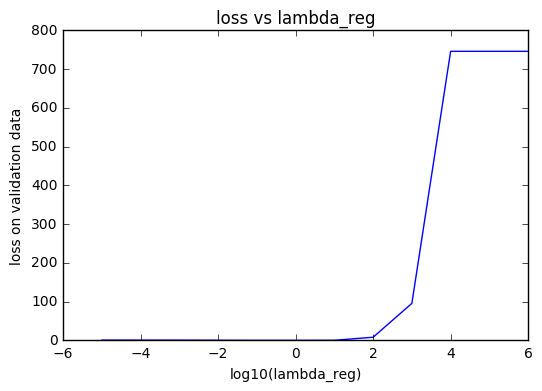

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline
lower = -5
upper = 6
loss_list = []
theta={}
for i in range(lower,upper+1):
    lambda_reg = 10**(i)
    theta_init = np.zeros(X_training.shape[1])
    theta_temp = LassoShooting(X_training, y_training, lambda_reg, theta_init, max_iter=2000,tol=10**-3)
    theta[lambda_reg] = theta_temp
    loss = compute_loss(X_validation, y_validation,theta[lambda_reg])
    loss_list.append(loss)
plt.plot(range(lower,upper+1),loss_list)
plt.xlabel("log10(lambda_reg)")
plt.ylabel("loss on validation data")
plt.title("loss vs lambda_reg")
plt.show()

In [284]:
## Return the best lambda and loss.
opt_lambda = 10**(np.argmin(loss_list)+lower)
theta_lasso = LassoShooting(X_training, y_training, 1, theta_init, max_iter=2000,tol=10**-4)
first_10, rest = check_correct(theta_lasso,0.001)
print("Lambda = %f" % opt_lambda)
print("for lambda=%f, there are %d non zero components and %d zero components is estimated incorrectly" % (opt_lambda, first_10, rest))
print ("The loss for objective function is %f" % (loss_list[np.argmin(loss_list)]))
print("---------------------------")
print("Theta of lambda=1 is", theta[1])

Lambda = 1.000000
for lambda=1.000000, there are 0 non zero components and 13 zero components is estimated incorrectly
The loss for objective function is 0.010010
---------------------------
Theta of lambda=1 is [-10.01588638   9.81574636  -9.93303339  -9.93629864 -10.01666532
  -9.96227547 -10.0113237   -9.85022043  -9.92745564  -9.90880682   0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.      

## 3.2

In [287]:
# Check Sparsity
for i in range(-5,0):
    threshold = 10**(i)
    first_10, rest = check_correct(theta[opt_lambda],threshold)
    print("threshold = %f" % i)
    print("for threshold=%f, there are %d non zero components and %d zero components is estimated incorrectly" % (i, first_10, rest))
    print("---------------------------")

threshold = -5.000000
for threshold=-5.000000, there are 0 non zero components and 13 zero components is estimated incorrectly
---------------------------
threshold = -4.000000
for threshold=-4.000000, there are 0 non zero components and 13 zero components is estimated incorrectly
---------------------------
threshold = -3.000000
for threshold=-3.000000, there are 0 non zero components and 13 zero components is estimated incorrectly
---------------------------
threshold = -2.000000
for threshold=-2.000000, there are 0 non zero components and 9 zero components is estimated incorrectly
---------------------------
threshold = -1.000000
for threshold=-1.000000, there are 0 non zero components and 0 zero components is estimated incorrectly
---------------------------


## 3.3

In [377]:
# Initial lambda_max, which is the supremum norm
lambda_max = 2*max(abs(np.dot(X_training.T,y_training)))
theta_init = np.zeros(X_training.shape[1])

def homotopy(X, y, lambda_reg, theta, max_iter,tol):
    num_iter = 0
    diff=1
    loss_list=[]
    lambda_list=[]
    theta_new=np.copy(theta)
    while ( num_iter < max_iter and diff>10**(-5)):
        theta_old = np.copy(theta_new)
        lambda_list.append(lambda_reg)
        theta_new = LassoShooting(X, y, lambda_reg, theta_old, 3000, tol)
        loss_list.append(compute_loss(X_validation, y_validation, theta_new))
        diff = np.linalg.norm(theta_new-theta_old)
        num_iter = num_iter+1
        lambda_reg = lambda_reg/10
    return loss_list,theta_new, lambda_list

def regular_lasso(X, y, lambda_reg, theta, max_iter,tol=10**-4):
    num_iter = 0
    diff=1
    loss_list=[]
    lambda_list=[]
    theta_new=np.copy(theta)
    while ( num_iter < max_iter and diff>10**(-5)):
        theta_old = np.copy(theta_new)
        lambda_list.append(lambda_reg)
        #theta = np.zeros(X_training.shape[1])
        theta_new = LassoShooting(X, y, lambda_reg, theta, 3000,tol)
        loss_list.append(compute_loss(X_validation, y_validation, theta_new))
        diff = np.linalg.norm(theta_new-theta_old)
        num_iter = num_iter+1
        lambda_reg = lambda_reg/10
    return loss_list,theta_new, lambda_list

In [378]:
lambda_max = 2*max(abs(np.dot(X_training.T,y_training)))
lambda_max

3805.6535543577202

In [379]:
from time import clock
start = clock()
loss_list, theta_opt, lambda_list = homotopy(X_training, y_training, 1000, theta_init, max_iter=1000,tol=10**-3)
end=clock()
time_fast = end-start

start = clock()
loss_list, theta_opt, lambda_list = regular_lasso(X_training, y_training, 1000, theta_init, max_iter=1000,tol=10**-3)
end=clock()
time_slow = end-start
print('Lasso_Shooting_fast: %f seconds' %time_fast)
print('Lasso_Shooting_slow: %f seconds' %time_slow)

Lasso_Shooting_fast: 2.276907 seconds
Lasso_Shooting_slow: 26.779143 seconds


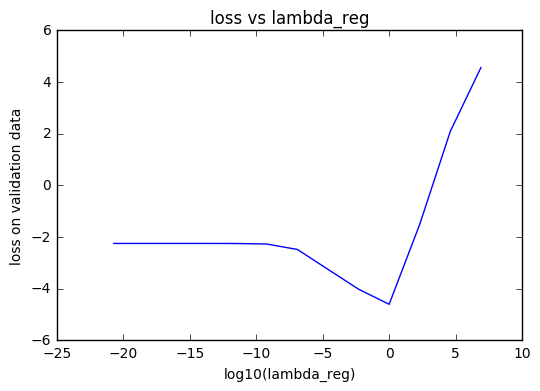

In [383]:
plt.plot(np.log(lambda_list),np.log(loss_list))
plt.xlabel("log10(lambda_reg)")
plt.ylabel("loss on validation data")
plt.title("loss vs lambda_reg")
plt.show()

## 3.4

In [248]:
def LassoShooting(X, y, lambda_reg, theta, max_iter,tol=10**-4):
    '''
    Coordinate descent for lasso, using vector presentation
    '''
    diff = 1  
    num_iter = 0
    theta_new=np.copy(theta)
    while ( num_iter < max_iter and diff > tol): 
        theta_old = np.copy(theta_new)
        for j in range(theta_new.shape[0]):           
            a = 2*np.dot(X[:,j], X[:,j])
            c = 2*np.dot(X[:,j],y - X.dot(theta_new) + theta_new[j] * X[:,j])
            temp_1, temp_2 = c/a,lambda_reg/a
            theta_new[j] = soft(temp_1, temp_2)
        diff = np.linalg.norm(theta_new-theta_old)
        num_iter += 1
    return theta_new

In [288]:
from time import clock
lambda_list = [10**x for x in range(-5,0)]

start = clock()
for lambda_reg in lambda_list:
    theta = LassoShooting(X_training, y_training, 0.001, theta_init, 100,tol=10**-4)
end=clock()
time_fast = end-start

start = clock()
for lambda_reg in lambda_list:
    theta = LassoShooting_slow(X_training, y_training, 0.001, theta_init, 100,tol=10**-4)
end=clock()
time_slow = end-start
print('Lasso_Shooting_fast: %f seconds' %time_fast)
print('Lasso_Shooting_slow: %f seconds' %time_slow)

Lasso_Shooting_fast: 0.442182 seconds
Lasso_Shooting_slow: 10.242497 seconds
